#Importation des librairies

In [1]:
# Install TensorFlow and other necessary packages
!pip install tensorflow

In [2]:
# Install AutoGluon version 1.1.0
!pip install autogluon==1.1.0

In [32]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Add, Flatten
from tensorflow.keras.optimizers import Adam

import ray
import datetime

import IPython
import IPython.display
import matplotlib as mpl



from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer

from google.colab import drive

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jun 15 20:33:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# GitHub

In [ ]:
file_path = '/content/drive/MyDrive/00_CAS_Project/Git_token.txt'

# Step 3: Read the file and store its content in a variable
with open(file_path, 'r') as file:
    token = file.read().strip()

In [ ]:
username = 'SimRime'
repository = 'CAS-Final-Project_Simon-Rime'

# Remove the existing directory
!rm -rf CAS-Final-Project_Simon-Rime

!git clone https://{token}@github.com/{username}/{repository}

del token

Cloning into 'CAS-Final-Project_Simon-Rime'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 172 (delta 50), reused 65 (delta 20), pack-reused 0
Receiving objects: 100% (172/172), 22.19 MiB | 10.91 MiB/s, done.
Resolving deltas: 100% (50/50), done.


## Add Notebook

In [ ]:
import sys
sys.path.append('/content/CAS-Final-Project_Simon-Rime')  # Adjust the path to match your repository structure

In [ ]:
from my_metrics import custom_scorer

In [ ]:
# Copy the updated notebook from Google Drive to the specific directory
!cp /content/drive/MyDrive/00_CAS_Project/PowerPlant_NN.ipynb /content/CAS-Final-Project_Simon-Rime/Google_Colab_notebook/

# Change to the repository directory
%cd /content/CAS-Final-Project_Simon-Rime

# Set Git user identity (only needed once)
!git config --global user.email "rimesimon@gmail.com"
!git config --global user.name "SimRime"

# Pull the latest changes from the remote repository
!git pull origin main  # Use 'main' or 'master' based on your repository's default branch

# Add the updated notebook file to the Git index
!git add Google_Colab_notebook/PowerPlant_NN.ipynb

# Commit the changes
!git commit -m "Added PowerPlant_NN notebook"

# Push the changes to the remote repository
!git push -u origin main  # Use 'main' or 'master' based on your repository's default branch

/content/CAS-Final-Project_Simon-Rime
From https://github.com/SimRime/CAS-Final-Project_Simon-Rime
 * branch            main       -> FETCH_HEAD
Already up to date.
[main 73516d7] Added PowerPlant_NN notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Google_Colab_notebook/PowerPlant_NN.ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 472.89 KiB | 8.44 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SimRime/CAS-Final-Project_Simon-Rime
   9536435..73516d7  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


## Update Notebook

In [ ]:
# Copy the updated notebook from Google Drive to the specific directory
!cp /content/drive/MyDrive/00_CAS_Project/PowerPlant_NN.ipynb /content/CAS-Final-Project_Simon-Rime/Google_Colab_notebook/

# Change to the repository directory
%cd /content/CAS-Final-Project_Simon-Rime

# Add the updated notebook file to the Git index
!git add Google_Colab_notebook/PowerPlant_NN.ipynb

# Commit the changes
!git commit -m "Added save model"

# Pull the latest changes from the remote repository with rebase
!git pull origin main --rebase  # Use 'main' or 'master' based on your repository's default branch

# Push the changes to the remote repository
!git push -u origin main  # Use 'main' or 'master' based on your repository's default branch

/content/CAS-Final-Project_Simon-Rime
[main db69897] Added save model
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Google_Colab_notebook/PowerPlant_NN.ipynb (84%)
From https://github.com/SimRime/CAS-Final-Project_Simon-Rime
 * branch            main       -> FETCH_HEAD
Current branch main is up to date.
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.66 KiB | 100.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SimRime/CAS-Final-Project_Simon-Rime
   5672d5b..db69897  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


# Data importation and preparation

## Import data

In [6]:
# Define the file path and load the CSV file
Clean_Dataset_directory = '/content/drive/MyDrive/00_CAS_Project/Clean_Dataset'
Power_plant_file = os.path.join(Clean_Dataset_directory, 'Power_plant_data_full.csv')
Power_plant = pd.read_csv(Power_plant_file)
Power_plant.head()

,Time Stamp,Température extérieure [°C],Puissance [kW],Supply T,Return T,Puissance [kW]_1,Power_tot,DryBulbTemperature,Cluster 0,Cluster 1,...,Normalized_6_hours_before,Normalized_prev_half_day,Normalized_prev_day,HR_sin,HR_cos,D_Week_sin,D_Week_cos,YR_sin,YR_cos,total_installed_power
0,2020-01-02 01:00:00,4.9,1754.0,85.1,66.1,74.0,1828.0,1.5,610.0,1135.0,...,0.449387,0.471300,0.328536,0.258819,0.965926,0.433884,-0.900969,0.015769,0.999876,6115.0
1,2020-01-02 02:00:00,4.6,1806.0,85.2,65.8,74.0,1880.0,1.5,610.0,1135.0,...,0.434832,0.490270,0.355356,0.500000,0.866025,0.433884,-0.900969,0.016485,0.999864,6115.0
2,2020-01-02 03:00:00,4.3,1843.0,85.1,65.9,79.0,1922.0,1.4,610.0,1135.0,...,0.438921,0.482257,0.363859,0.707107,0.707107,0.433884,-0.900969,0.017202,0.999852,6115.0
3,2020-01-02 04:00:00,4.1,1938.0,85.1,65.7,85.0,2023.0,1.2,610.0,1135.0,...,0.427800,0.461325,0.354702,0.866025,0.500000,0.433884,-0.900969,0.017919,0.999839,6115.0
4,2020-01-02 05:00:00,3.9,1947.0,85.1,65.5,92.0,2039.0,0.9,610.0,1135.0,...,0.335732,0.471300,0.395585,0.965926,0.258819,0.433884,-0.900969,0.018635,0.999826,6115.0


## Data preparation

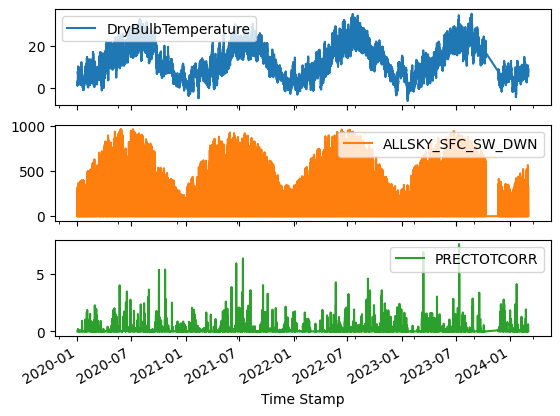

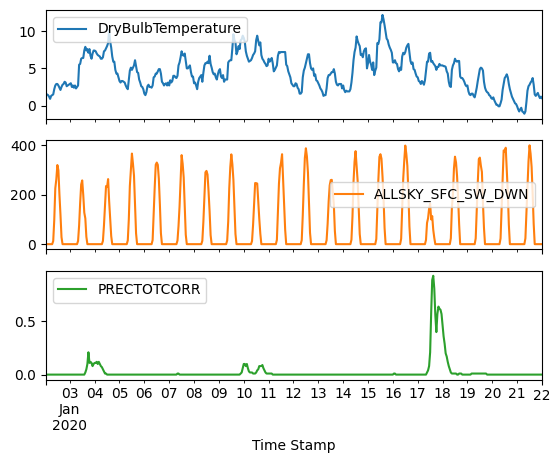

In [7]:
# Data preparation
# Drop the last row using iloc
Power_plant = Power_plant.iloc[:-1].copy()

# Drop rows with missing values
Power_plant = Power_plant.dropna()

# Time Series Analysis
Power_plant.loc[:, 'Time Stamp'] = pd.to_datetime(Power_plant['Time Stamp'])
Power_plant.set_index('Time Stamp', inplace=True)

plot_cols = ['DryBulbTemperature', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR']
plot_features = Power_plant[plot_cols]

_ = plot_features.plot(subplots=True)

plot_features = Power_plant[plot_cols][:480]
_ = plot_features.plot(subplots=True)

plt.show()

In [8]:
# Sum of Cluster columns
cluster_columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
Power_plant['Total'] = Power_plant[cluster_columns].sum(axis=1)

# Normalize each cluster column
for column in cluster_columns:
    Power_plant[column + ' Normalized'] = Power_plant[column] / Power_plant['Total']

# Drop the 'Total' column as it was only used for normalization
# Power_plant.drop(columns=['Total'], inplace=True)


### Split the data

We keep the value from the 1st february onward for the final testing, we don't use it whe fittin the scalar or training the model

In [9]:
# Split data into training and testing based on date
cutoff_date = pd.Timestamp('2024-02-01')
Power_plant_train = Power_plant[Power_plant.index < cutoff_date]
Power_plant_test = Power_plant[Power_plant.index >= cutoff_date]

Drop unecessary column

In [10]:
# List of columns to drop
columns_to_drop = [
    'Puissance [kW]',
    'Température extérieure [°C]',
    'Supply T',
    'Return T',
    'Puissance [kW]_1',
    'T2M',
    'MO',
    'YEAR',
    'HR',
    'Cluster 0',
    'Cluster 1',
    'Cluster 2',
    'Cluster 3',
    'Cluster 4',
    'Total',
    'Power_tot',
    'prev_hour',
    '2_hours_before',
    '3_hours_before',
    '4_hours_before',
    '5_hours_before',
    '6_hours_before',
    'prev_half_day',
    'prev_day',
    'total_installed_power'
]

# Drop the columns
Power_plant_train = Power_plant_train.drop(columns=columns_to_drop)
Power_plant_test = Power_plant_test.drop(columns=columns_to_drop)

# Reset the index to a classic integer-based index
Power_plant_train = Power_plant_train.reset_index(drop=True)
Power_plant_test = Power_plant_test.reset_index(drop=True)

Power_plant_train = Power_plant_train.dropna()
Power_plant_test = Power_plant_test.dropna()

Scaler fit

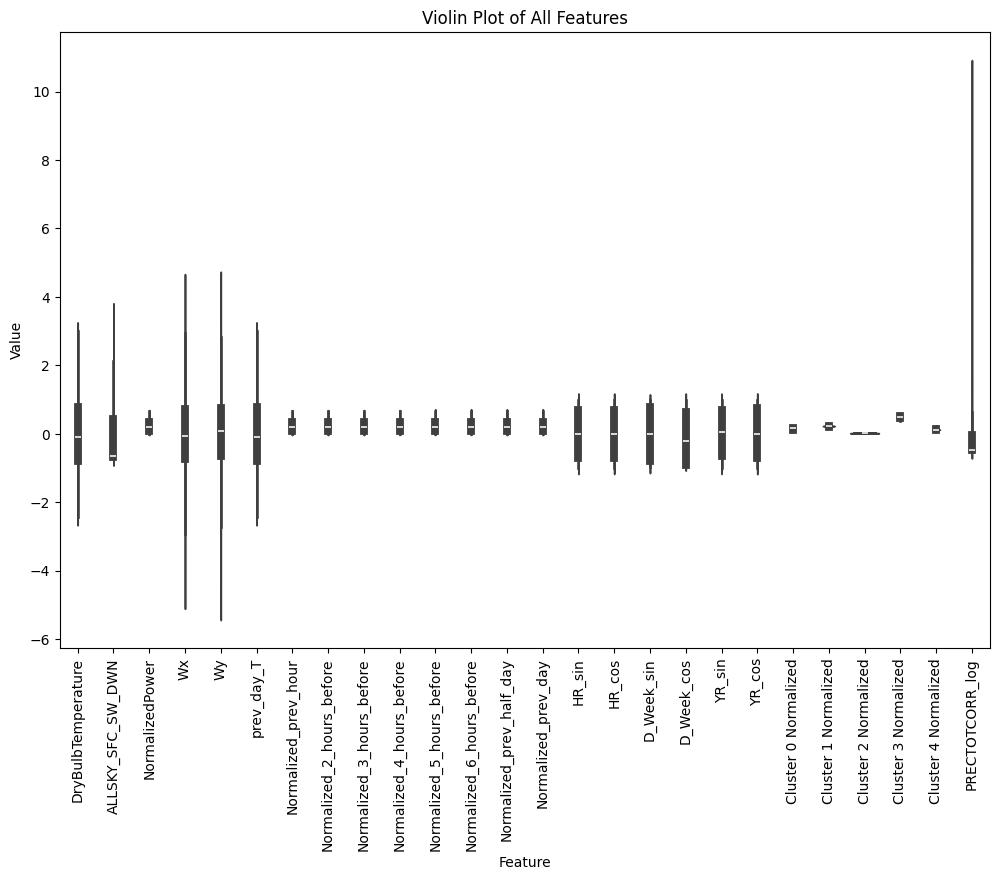

In [11]:
# Apply log transformation to the feature with exponential distribution
Power_plant_train['PRECTOTCORR_log'] = np.log1p(Power_plant_train['PRECTOTCORR'])
Power_plant_train = Power_plant_train.drop(columns='PRECTOTCORR')

Power_plant_test['PRECTOTCORR_log'] = np.log1p(Power_plant_test['PRECTOTCORR'])
Power_plant_test = Power_plant_test.drop(columns='PRECTOTCORR')


cols_to_standardize = ['prev_day_T', 'DryBulbTemperature', 'Wx', 'Wy', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR_log']

scaler = StandardScaler()
Power_plant_train[cols_to_standardize] = scaler.fit_transform(Power_plant_train[cols_to_standardize])
Power_plant_test[cols_to_standardize] = scaler.transform(Power_plant_test[cols_to_standardize])


data_melted = pd.melt(Power_plant_train, var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 8))
sns.violinplot(x='Feature', y='Value', data=data_melted)
plt.xticks(rotation=90)
plt.title('Violin Plot of All Features')
plt.show()

# AutoGluon

## Settings

In [ ]:
# AutoGluon
y_train = Power_plant_train['NormalizedPower']
X_train = Power_plant_train.drop(columns=['NormalizedPower'])
y_test = Power_plant_test['NormalizedPower']
X_test = Power_plant_test.drop(columns=['NormalizedPower'])

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

time_limit = 3600
metric = 'root_mean_squared_error'
k_fold = 5
stack_levels = 2
gpus = 1

## Training

In [ ]:
predictor = TabularPredictor(label='NormalizedPower', eval_metric=metric).fit(train_data,
                                                                              time_limit=time_limit,
                                                                              presets='best_quality',
                                                                              num_bag_folds=k_fold,
                                                                              num_stack_levels=stack_levels,
                                                                              num_gpus = gpus)

performance = predictor.evaluate(train_data)
print(performance)

No path specified. Models will be saved in: "AutogluonModels/ag-20240615_135755"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
CPU Count:          2
Memory Avail:       8.09 GB / 12.67 GB (63.8%)
Disk Space Avail:   165.67 GB / 201.23 GB (82.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

{'root_mean_squared_error': -0.010458830892282011, 'mean_squared_error': -0.00010938714363335251, 'mean_absolute_error': -0.007778274923104717, 'r2': 0.9950959895460539, 'pearsonr': 0.9975467302747487, 'median_absolute_error': -0.0061024576689526905}


## Predicitons and score

0      0.281211
1      0.279351
2      0.291204
3      0.288356
4      0.297606
         ...   
715    0.311341
716    0.324099
717    0.329578
718    0.315357
719    0.273645
Name: NormalizedPower, Length: 720, dtype: float32
Available columns in leaderboard:
Index(['model', 'score_test', 'score_val', 'eval_metric', 'pred_time_test',
       'pred_time_val', 'fit_time', 'pred_time_test_marginal',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')


<ipython-input-139-135e26ff7319>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




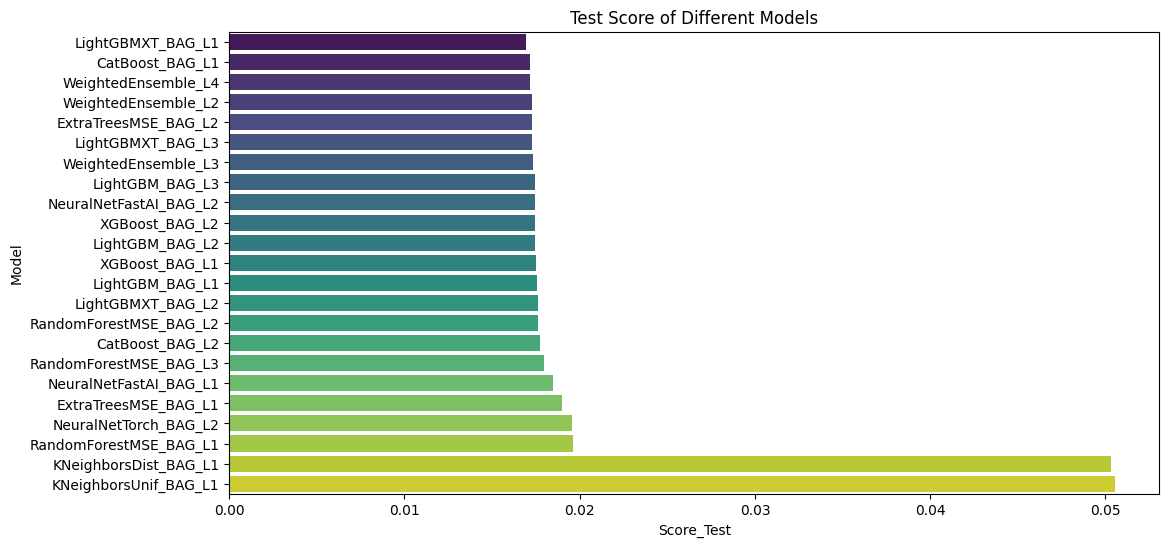

<ipython-input-139-135e26ff7319>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




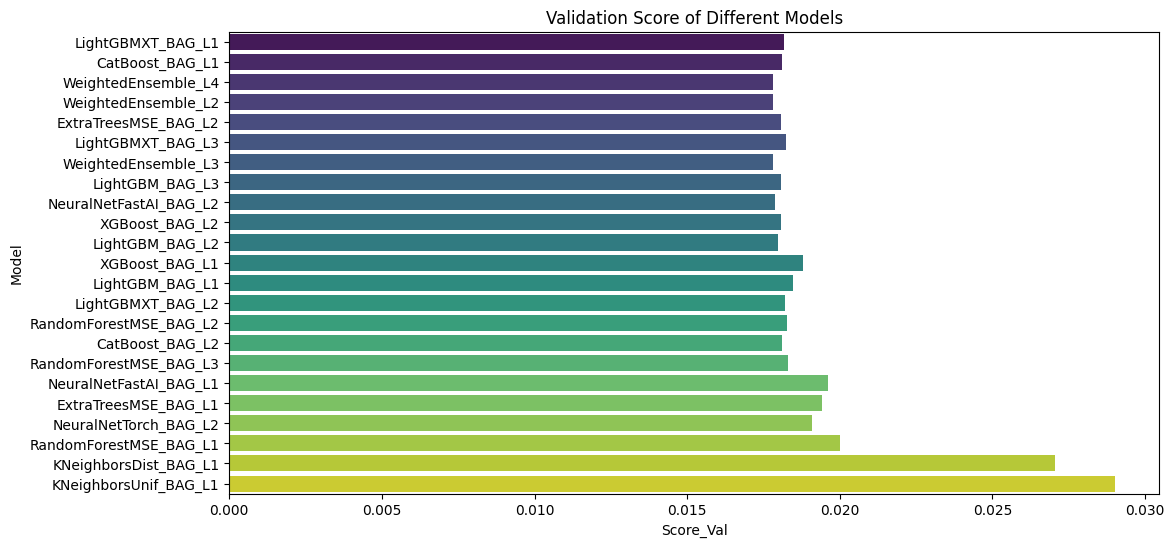

<ipython-input-139-135e26ff7319>:28: DeprecationWarning:

`get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!



Best model used for prediction: WeightedEnsemble_L4
                     model  score_test  score_val              eval_metric  \
0        LightGBMXT_BAG_L1   -0.016944  -0.018184  root_mean_squared_error   
1          CatBoost_BAG_L1   -0.017135  -0.018116  root_mean_squared_error   
2      WeightedEnsemble_L4   -0.017154  -0.017799  root_mean_squared_error   
3      WeightedEnsemble_L2   -0.017265  -0.017829  root_mean_squared_error   
4     ExtraTreesMSE_BAG_L2   -0.017266  -0.018063  root_mean_squared_error   
5        LightGBMXT_BAG_L3   -0.017293  -0.018255  root_mean_squared_error   
6      WeightedEnsemble_L3   -0.017340  -0.017809  root_mean_squared_error   
7          LightGBM_BAG_L3   -0.017450  -0.018076  root_mean_squared_error   
8   NeuralNetFastAI_BAG_L2   -0.017458  -0.017864  root_mean_squared_error   
9           XGBoost_BAG_L2   -0.017469  -0.018070  root_mean_squared_error   
10         LightGBM_BAG_L2   -0.017476  -0.017962  root_mean_squared_error   
11          

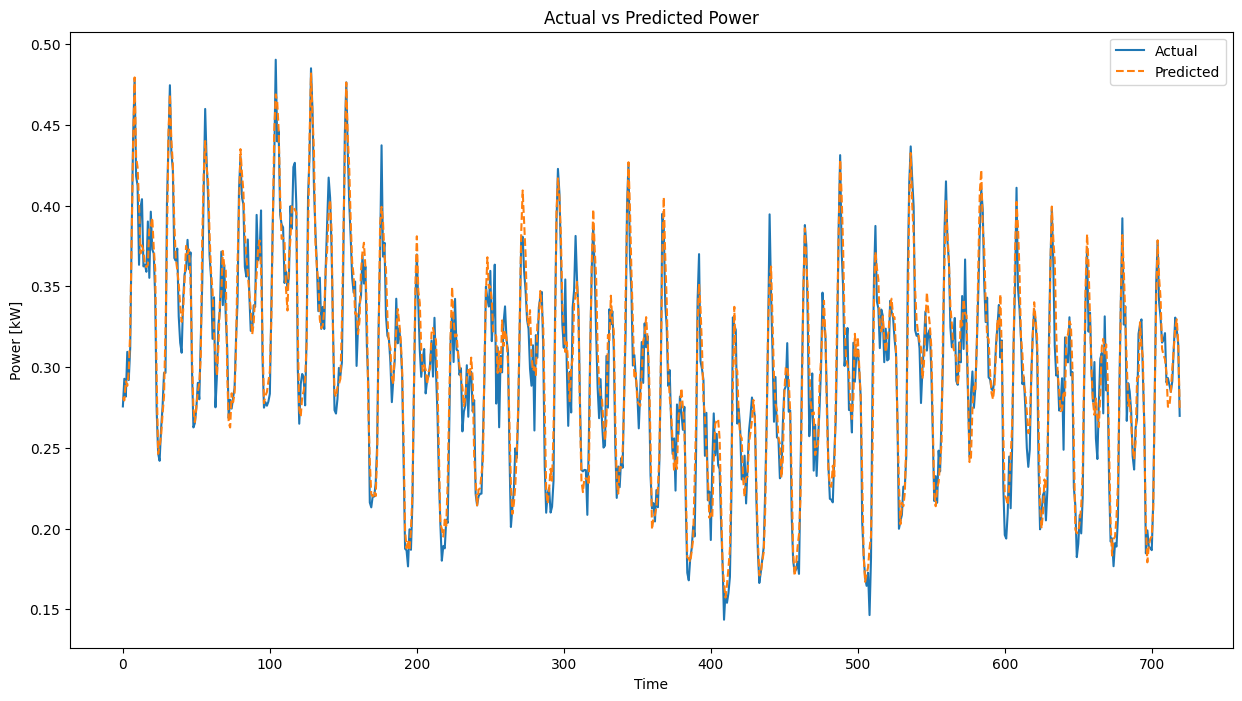

In [ ]:
predictions = predictor.predict(X_test)
print(predictions)

leaderboard = predictor.leaderboard(test_data, silent=True)
print("Available columns in leaderboard:")
print(leaderboard.columns)

models = leaderboard['model']
score_test = -leaderboard['score_test']
score_val = -leaderboard['score_val']

metrics_df = pd.DataFrame({
    'Model': models,
    'Score_Test': score_test,
    'Score_Val': score_val
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Test', y='Model', data=metrics_df, palette='viridis')
plt.title('Test Score of Different Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Val', y='Model', data=metrics_df, palette='viridis')
plt.title('Validation Score of Different Models')
plt.show()

best_model = predictor.get_model_best()
print(f"Best model used for prediction: {best_model}")

leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

predictions = predictor.predict(X_test)

plot_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

plot_df = plot_df.reset_index(drop=True)

plt.figure(figsize=(15, 8))
plt.plot(plot_df['Actual'], label='Actual')
plt.plot(plot_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Power [kW]')
plt.title('Actual vs Predicted Power')
plt.legend()
plt.show()

In [ ]:
# Define source and destination paths
source_path = '/content/CAS-Final-Project_Simon-Rime/AutogluonModels/ag-20240615_135755'
destination_path = '/content/drive/MyDrive/00_CAS_Project/Model'

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Copy the directory to the destination path
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Directory has been copied from {source_path} to {destination_path}")

Directory has been copied from /content/CAS-Final-Project_Simon-Rime/AutogluonModels/ag-20240615_135755 to /content/drive/MyDrive/00_CAS_Project/Model


# AutoGluon with custom loss function

In [15]:
# AutoGluon
Power_plant_train.drop(columns=['PRECTOTCORR_log'])
Power_plant_test.drop(columns=['PRECTOTCORR_log'])
y_train = Power_plant_train['NormalizedPower']
X_train = Power_plant_train.drop(columns=['NormalizedPower'])
y_test = Power_plant_test['NormalizedPower']
X_test = Power_plant_test.drop(columns=['NormalizedPower'])

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

time_limit = 1800
k_fold = 0
stack_levels = 0
gpus = 1

Import the custom metric from a python file.

As explained in:

https://auto.gluon.ai/stable/tutorials/tabular/advanced/tabular-custom-metric.html

In [13]:
# Shut down Ray if it was previously initialized
ray.shutdown()

# Change to the repository directory (if required, for Jupyter notebooks or specific environments)
%cd /content/CAS-Final-Project_Simon-Rime

# Initialize Ray with the runtime environment, pointing to the directory containing `my_metrics.py`
ray.init(runtime_env={"working_dir": ".", "py_modules": ["custom_metrics"]})

from custom_metrics.my_metrics import custom_scorer

/content/CAS-Final-Project_Simon-Rime


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-06-15 20:34:34,931	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2024-06-15 20:34:34,956	INFO packaging.py:530 -- Creating a file package for local directory 'custom_metrics'.
2024-06-15 20:34:34,966	INFO packaging.py:358 -- Pushing file package 'gcs://_ray_pkg_c8d2edf8777708c6.zip' (0.00MiB) to Ray cluster...
2024-06-15 20:34:34,971	INFO packaging.py:371 -- Successfully pushed file package 'gcs://_ray_pkg_c8d2edf8777708c6.zip'.
2024-06-15 20:34:35,523	INFO packaging.py:530

In [14]:
%cd /content/

/content


In [16]:
predictor_custom = TabularPredictor(label='NormalizedPower', eval_metric=custom_scorer).fit(train_data,
                                                                              time_limit=time_limit,
                                                                              presets='best_quality',
                                                                              num_bag_folds=k_fold,
                                                                              num_stack_levels=stack_levels,
                                                                              num_gpus = gpus)

No path specified. Models will be saved in: "AutogluonModels/ag-20240615_203459"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "AutogluonModels/ag-20240615_203459"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
CPU Count:          2
Memory Avail:       9.92 GB / 12.67 GB (78.3%)
Disk Space Avail:   158.96 GB / 201.23 GB (79.0%)
Train Data Rows:    34048
Train Data Columns: 25
Label Column:       NormalizedPower
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.6533333333333333, 0.0003826530612244, 0.22548, 0.14935)
	If

In [17]:
performance = predictor_custom.evaluate(train_data)
print(performance)

{'custom_loss': -0.00024169830915065255, 'root_mean_squared_error': -0.015546649450947704, 'mean_squared_error': -0.00024169830915065255, 'mean_absolute_error': -0.011212644994595233, 'r2': 0.9891642564619041, 'pearsonr': 0.9945918699358486, 'median_absolute_error': -0.008600481617718564}


0      0.280319
1      0.275624
2      0.288358
3      0.285883
4      0.300099
         ...   
715    0.318763
716    0.325654
717    0.327607
718    0.319247
719    0.271004
Name: NormalizedPower, Length: 720, dtype: float32
Available columns in leaderboard:
Index(['model', 'score_test', 'score_val', 'eval_metric', 'pred_time_test',
       'pred_time_val', 'fit_time', 'pred_time_test_marginal',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')


<ipython-input-21-248fc61d38a3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Test', y='Model', data=metrics_df, palette='viridis')


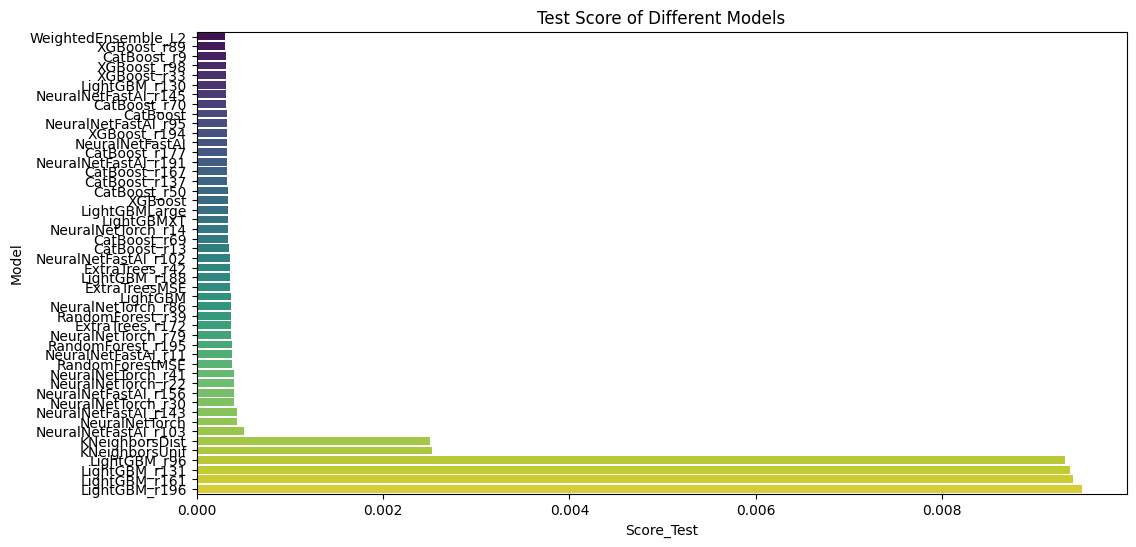

<ipython-input-21-248fc61d38a3>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score_Val', y='Model', data=metrics_df, palette='viridis')


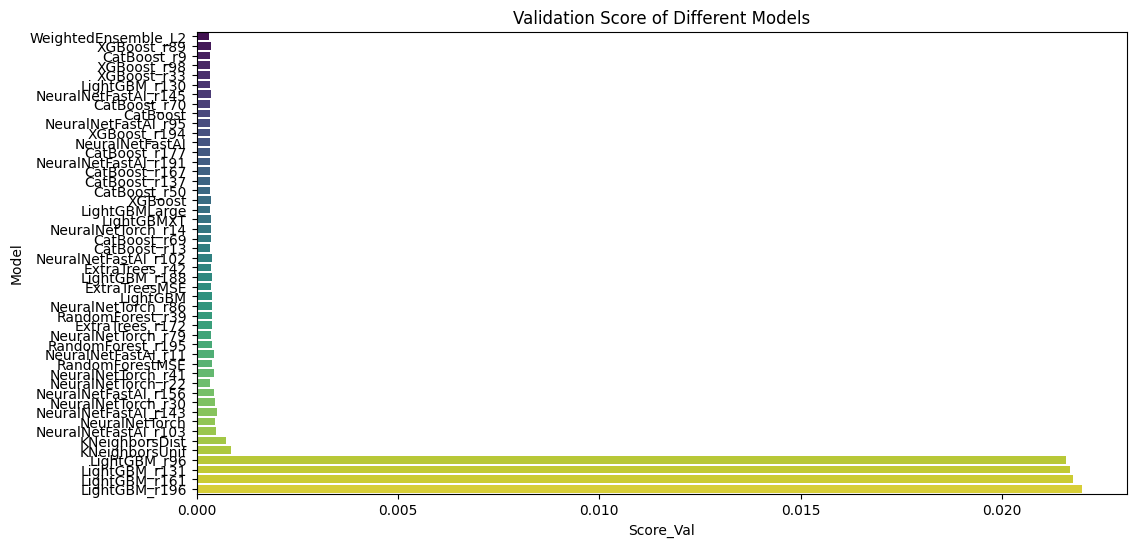

Best model used for prediction: WeightedEnsemble_L2


In [21]:
predictions = predictor_custom.predict(X_test)
print(predictions)

leaderboard = predictor_custom.leaderboard(test_data, silent=True)
print("Available columns in leaderboard:")
print(leaderboard.columns)

models = leaderboard['model']
score_test = -leaderboard['score_test']
score_val = -leaderboard['score_val']

metrics_df = pd.DataFrame({
    'Model': models,
    'Score_Test': score_test,
    'Score_Val': score_val
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Test', y='Model', data=metrics_df, palette='viridis')
plt.title('Test Score of Different Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Score_Val', y='Model', data=metrics_df, palette='viridis')
plt.title('Validation Score of Different Models')
plt.show()

# Get the best model's name
best_model = predictor_custom.model_best
print(f"Best model used for prediction: {best_model}")

Take a long time to run

In [ ]:
# Retrieve feature importances for the best model
feature_importances = predictor_custom.feature_importance(train_data, model=best_model)
print("Feature importances for the best model:")
print(feature_importances)

# Plot feature importances
feature_importances_df = pd.DataFrame({
    'Feature': feature_importances.index,
    'Importance': feature_importances.values
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances for the Best Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [24]:
# Get general information about all models
info = predictor_custom.info()
info

{'path': 'AutogluonModels/ag-20240615_203459',
 'label': 'NormalizedPower',
 'random_state': 0,
 'version': '1.1.0',
 'features': ['DryBulbTemperature',
  'ALLSKY_SFC_SW_DWN',
  'Wx',
  'Wy',
  'prev_day_T',
  'Normalized_prev_hour',
  'Normalized_2_hours_before',
  'Normalized_3_hours_before',
  'Normalized_4_hours_before',
  'Normalized_5_hours_before',
  'Normalized_6_hours_before',
  'Normalized_prev_half_day',
  'Normalized_prev_day',
  'HR_sin',
  'HR_cos',
  'D_Week_sin',
  'D_Week_cos',
  'YR_sin',
  'YR_cos',
  'Cluster 0 Normalized',
  'Cluster 1 Normalized',
  'Cluster 2 Normalized',
  'Cluster 3 Normalized',
  'Cluster 4 Normalized',
  'PRECTOTCORR_log'],
 'feature_metadata_in': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x785145e44d30>,
 'time_fit_preprocessing': 0.3458881378173828,
 'time_fit_training': 1800.3889632225037,
 'time_fit_total': 1800.734851360321,
 'time_limit': 1800,
 'time_train_start': 1718483699.9588003,
 'num_rows_train': 31548,
 'num

In [25]:
# Get the best model's name
best_model = predictor_custom.model_best
best_model_info = info['model_info'][best_model]

print("Best model characteristics:")
best_model_info

Best model characteristics:


{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'custom_loss',
 'stopping_metric': 'custom_loss',
 'fit_time': 0.052124977111816406,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.0010538101196289062,
 'val_score': -0.0003101313709376699,
 'hyperparameters': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': False},
 'num_features': 5,
 'features': ['CatBoost_

## Predictions for february

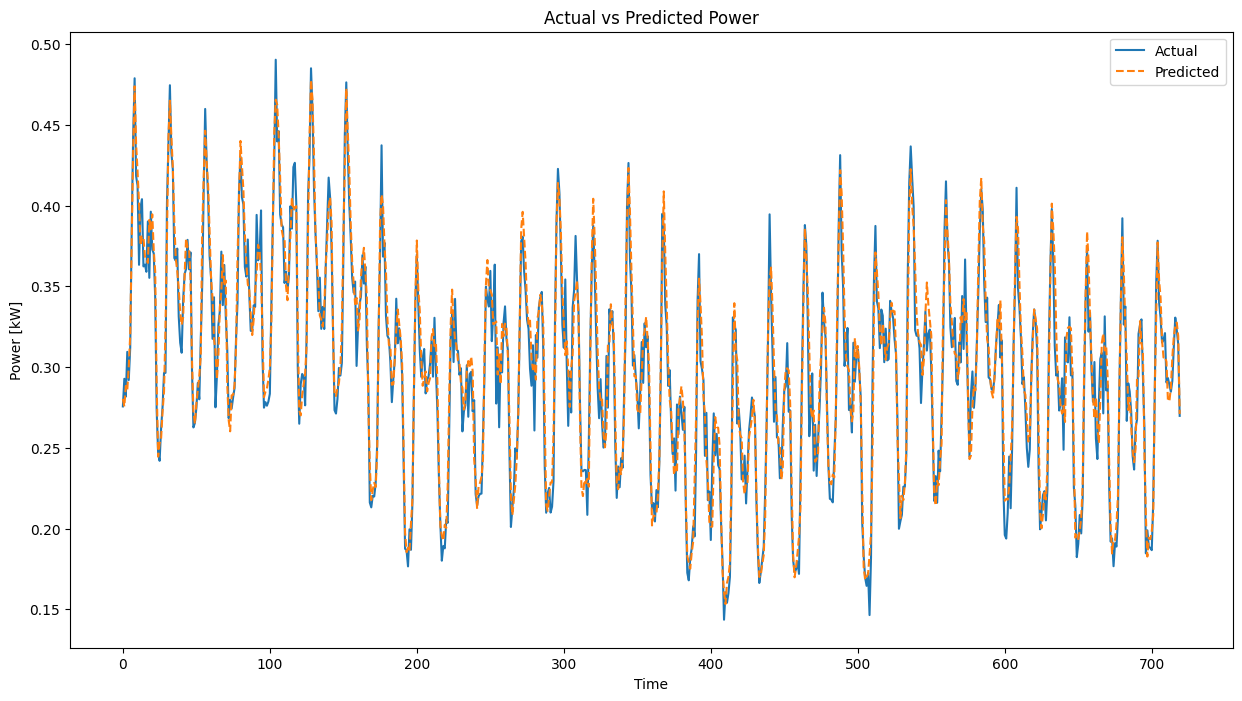

In [26]:
# Assuming predictor_custom is already defined and trained
predictions_test = predictor_custom.predict(X_test)

# Create a DataFrame including the index from Power_plant_test
plot_df = pd.DataFrame({
    'Index': Power_plant_test.index,
    'Actual': y_test,
    'Predicted': predictions
})

# Reset the index to keep the Power_plant_test index as a column
plot_df = plot_df.reset_index(drop=True)

# Plot the actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(plot_df['Index'], plot_df['Actual'], label='Actual')
plt.plot(plot_df['Index'], plot_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Power [kW]')
plt.title('Actual vs Predicted Power')
plt.legend()
plt.show()

## Predictions for the whole period

In [27]:
y_train = Power_plant_train['NormalizedPower']
X_train = Power_plant_train.drop(columns=['NormalizedPower'])

predictions_train = predictor_custom.predict(X_train)

# Create a DataFrame including the index from Power_plant_train
plot_df_train = pd.DataFrame({
    'Index': Power_plant_train.index,
    'Actual': y_train,
    'Predicted': predictions_train
})

# Reset the index to keep the Power_plant_train index as a column
plot_df_train = plot_df_train.reset_index(drop=True)

# Create a dynamic plot with Plotly
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(
    x=plot_df_train['Index'], y=plot_df_train['Actual'],
    mode='lines', name='Actual'
))

fig.add_trace(go.Scatter(
    x=plot_df_train['Index'], y=plot_df_train['Predicted'],
    mode='lines', name='Predicted', line=dict(dash='dash')
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Power on Training Data',
    xaxis_title='Time',
    yaxis_title='Power [kW]',
    legend_title='Legend',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

fig.show()

## Residuals plot

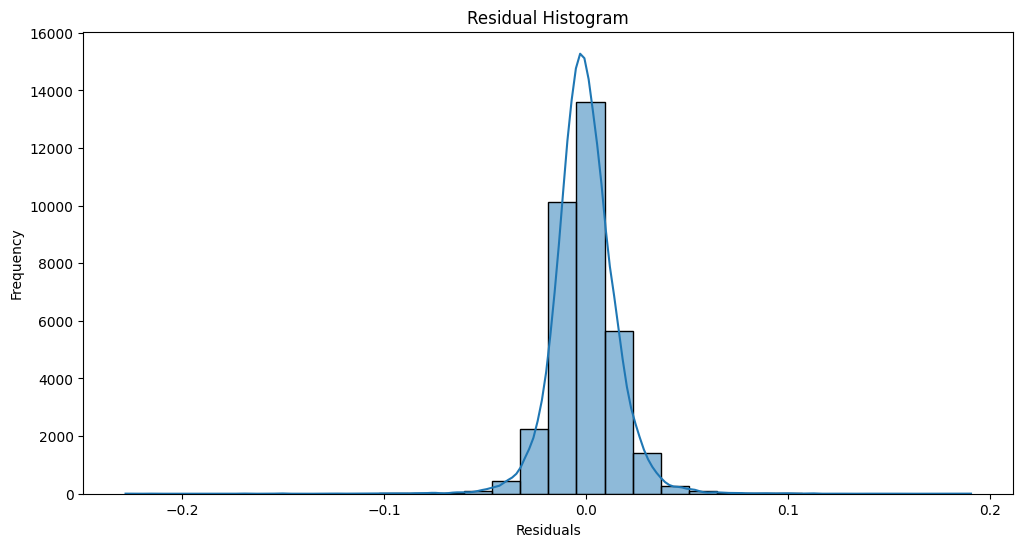

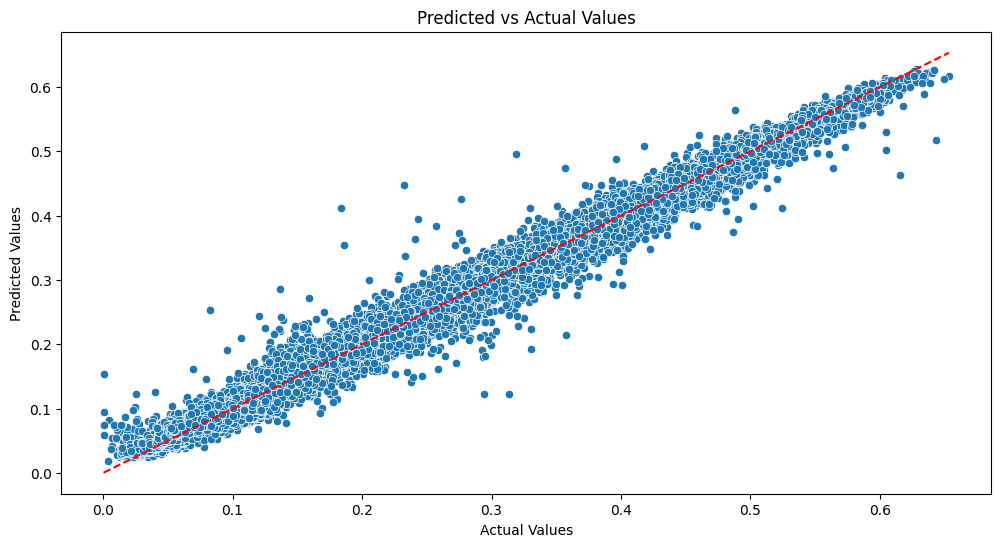

In [28]:
# Calculate residuals
plot_df_train['Residuals'] = plot_df_train['Actual'] - plot_df_train['Predicted']

# Plot Residual Histogram
plt.figure(figsize=(12, 6))
sns.histplot(plot_df_train['Residuals'], kde=True, bins=30)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Predicted vs Actual Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=plot_df_train['Actual'], y=plot_df_train['Predicted'])
plt.plot([plot_df_train['Actual'].min(), plot_df_train['Actual'].max()],
         [plot_df_train['Actual'].min(), plot_df_train['Actual'].max()], 'r--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

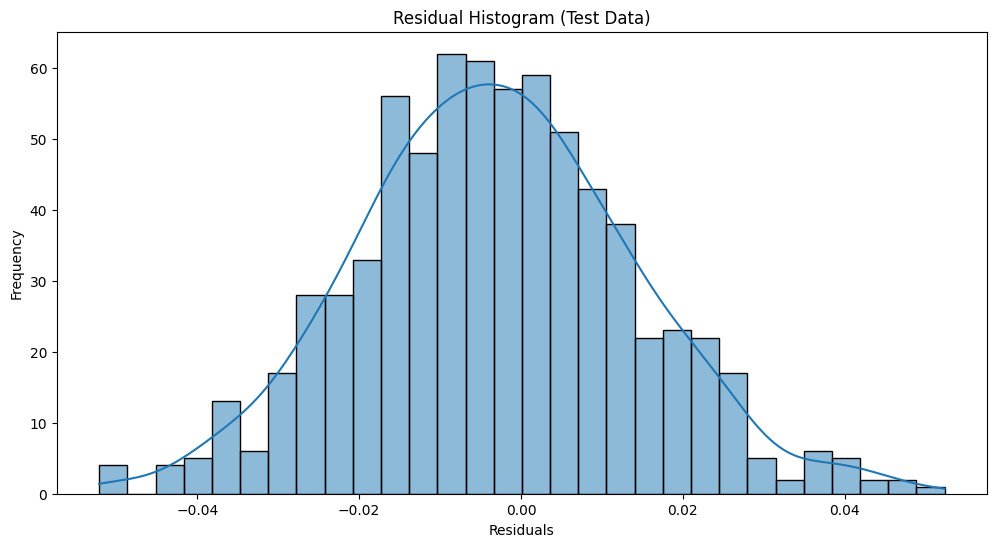

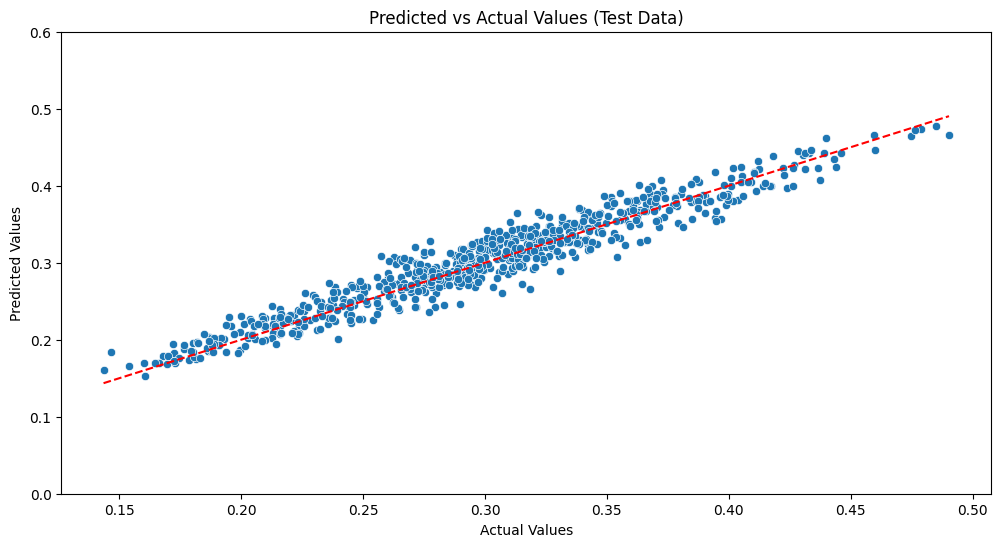

In [29]:
# Create a DataFrame including the index from Power_plant_test
plot_df_test = pd.DataFrame({
    'Index': Power_plant_test.index,
    'Actual': y_test,
    'Predicted': predictions_test
})

# Calculate residuals
plot_df_test['Residuals'] = plot_df_test['Actual'] - plot_df_test['Predicted']

# Plot Residual Histogram for Test Data
plt.figure(figsize=(12, 6))
sns.histplot(plot_df_test['Residuals'], kde=True, bins=30)
plt.title('Residual Histogram (Test Data)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Predicted vs Actual Scatter Plot for Test Data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=plot_df_test['Actual'], y=plot_df_test['Predicted'])
plt.plot([plot_df_test['Actual'].min(), plot_df_test['Actual'].max()],
         [plot_df_test['Actual'].min(), plot_df_test['Actual'].max()], 'r--')
plt.title('Predicted vs Actual Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(0, 0.6)  # Set y-axis limits
plt.show()

In [33]:
# Example actual and predicted values
actual_values = np.array([0.3, 0.2, 0.5, 0.6])
predicted_values = np.array([0.31, 0.21, 0.48, 0.59])

# Calculate MAE
mae = mean_absolute_error(plot_df_test['Actual'], plot_df_test['Predicted'])

print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.013859064351913355


In [34]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example with your actual and predicted data
mape = mean_absolute_percentage_error(plot_df_test['Actual'], plot_df_test['Predicted'])

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Percentage Error (MAPE): 4.800403606775565%


## Save model

In [ ]:
# Define source and destination paths
source_path = '/content/CAS-Final-Project_Simon-Rime/AutogluonModels/ag-20240615_203459'
destination_path = '/content/drive/MyDrive/00_CAS_Project/Model_custom'

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Copy the directory to the destination path
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Directory has been copied from {source_path} to {destination_path}")

# PCA

In [ ]:
# PCA
columns_to_include = [
    'NormalizedPower',
    'DryBulbTemperature',
    'Wx',
    'Wy',
    'ALLSKY_SFC_SW_DWN',
    'Normalized_prev_hour',
    'Normalized_2_hours_before',
    'Normalized_3_hours_before',
    'Normalized_4_hours_before',
    'Normalized_5_hours_before',
    'Normalized_6_hours_before',
    'Normalized_prev_half_day',
    'Normalized_prev_day',
    'prev_day_T',
    'HR_sin',
    'HR_cos',
    'D_Week_sin',
    'D_Week_cos',
    'YR_sin',
    'YR_cos',
    'Cluster 0 Normalized',
    'Cluster 1 Normalized',
    'Cluster 2 Normalized',
    'Cluster 3 Normalized',
    'Cluster 4 Normalized'
]

subset_data = Power_plant_train[columns_to_include]

# Columns to be standardized
columns_to_standardize = [
    'DryBulbTemperature',
    'Wx',
    'Wy',
    'ALLSKY_SFC_SW_DWN',
    'prev_day_T'
]

# Standardize the specified columns
scaler = StandardScaler()
subset_data[columns_to_standardize] = scaler.fit_transform(subset_data[columns_to_standardize])

# Perform PCA
pca = PCA(n_components=len(columns_to_include))
pca.fit(subset_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, label='Explained Variance')
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

components = pd.DataFrame(pca.components_, columns=columns_to_include)

for i in range(len(columns_to_include)):
    sorted_components = components.iloc[i].abs().sort_values(ascending=False)
    top_15_features = sorted_components.index[:15]
    top_15_values = sorted_components.values[:15]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_15_values, y=top_15_features)
    plt.xlabel('Absolute Loading Value')
    plt.ylabel('Features')
    plt.title(f'Top 15 Features for Principal Component {i + 1}')
    plt.show()

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy